# Data Science for Social Justice Workshop Group Project: Ukraine


## 1. Preprocessing

### 1-1. Importing Data with pandas

In [1]:
%pwd ##it will be different for all

'C:\\Users\\zhuli\\OneDrive\\Desktop\\data science + social justice\\Ukraine project'

In [2]:
import os

In [3]:
os.chdir('data') ##it will be different for all

In [4]:
import pandas as pd

In [5]:
df = pd.read_csv('submissions.csv')

In [6]:
df.shape

(88764, 18)

In [7]:
# 18 variables
list (df)

['idint',
 'idstr',
 'created',
 'self',
 'nsfw',
 'author',
 'title',
 'url',
 'selftext',
 'score',
 'subreddit',
 'distinguish',
 'textlen',
 'num_comments',
 'flair_text',
 'flair_css_class',
 'augmented_at',
 'augmented_count']

In [8]:
df.head()

,idint,idstr,created,self,nsfw,author,title,url,selftext,score,subreddit,distinguish,textlen,num_comments,flair_text,flair_css_class,augmented_at,augmented_count
0,13054757,t3_7rt45,1232688225,0,0,nikitos2009,Лучший политический ресурс в Украине,http://pepper.at.ua/,NaN,0,ukraine,NaN,0,0,NaN,NaN,NaN,NaN
1,13072291,t3_7s6n7,1232834472,1,0,OlehM,Dr,NaN,[removed],1,ukraine,NaN,9,0,NaN,NaN,NaN,NaN
2,13093545,t3_7sn1l,1233019738,0,0,nikitos2009,Основы гармонии украинства с московством,http://pepper.at.ua/publ/8-1-0-30,NaN,1,ukraine,NaN,0,0,NaN,NaN,NaN,NaN
3,13118896,t3_7t6ls,1233182615,0,0,nikitos2009,Служба Бандеризации Украины выясняет кто убил ...,http://pepper.at.ua/publ/8-1-0-34,NaN,1,ukraine,NaN,0,0,NaN,NaN,NaN,NaN
4,13238506,t3_7vqwa,1234081946,0,0,ger4antche,amzek.blogspot.com,http://amzek.blogspot.com,NaN,0,ukraine,NaN,0,1,NaN,NaN,NaN,NaN


### 1-2. Dropping Columns and Missing Values

In [9]:
##remove some columns that we are not going to use

df = df.drop(['self', 'url', 'subreddit', 'augmented_at', 'augmented_count'], axis=1)
df.head()

,idint,idstr,created,nsfw,author,title,selftext,score,distinguish,textlen,num_comments,flair_text,flair_css_class
0,13054757,t3_7rt45,1232688225,0,nikitos2009,Лучший политический ресурс в Украине,NaN,0,NaN,0,0,NaN,NaN
1,13072291,t3_7s6n7,1232834472,0,OlehM,Dr,[removed],1,NaN,9,0,NaN,NaN
2,13093545,t3_7sn1l,1233019738,0,nikitos2009,Основы гармонии украинства с московством,NaN,1,NaN,0,0,NaN,NaN
3,13118896,t3_7t6ls,1233182615,0,nikitos2009,Служба Бандеризации Украины выясняет кто убил ...,NaN,1,NaN,0,0,NaN,NaN
4,13238506,t3_7vqwa,1234081946,0,ger4antche,amzek.blogspot.com,NaN,0,NaN,0,1,NaN,NaN


In [10]:
##get rid of posts that have been deleted/removed

df = df.loc[~df['selftext'].isin(['[removed]', '[deleted]' ]),:]
df.shape

(73414, 13)

In [11]:
## drop null values
df = df.dropna(subset=['selftext'])
df.shape

(16665, 13)

In [12]:
df.head()

,idint,idstr,created,nsfw,author,title,selftext,score,distinguish,textlen,num_comments,flair_text,flair_css_class
35,26781072,t3_fy0eo,1299351508,0,margys,"Мам, а когда я выросту, ты постареешь?...",Сегодня моя золотая птичка снова задалась вопр...,0,NaN,204,0,NaN,NaN
36,26795140,t3_fyb9g,1299397232,0,pozhaluista,Does the /r/ Ukraine have anyone here? Hello?,Seems quiet.,10,NaN,13,24,NaN,NaN
50,29482904,t3_hjx5k,1306343697,0,visarun,Does immigration in Simferpol check whether th...,I have stayed 70 days and then 80 days out of ...,0,NaN,223,1,NaN,NaN
51,29608809,t3_hmmax,1306639850,0,[deleted],Tickets to Ukraine from Seoul?,Hi everyone. I'd like to visit Ukraine for th...,2,NaN,281,0,NaN,NaN
62,33263382,t3_jsy6u,1314200067,0,lsakbaetle3r9,looking for someone,had a friend who moved to my town ~4-5 years a...,3,NaN,386,1,NaN,NaN


In [13]:
##remove the rows with non-enlish text
!pip install langdetect
from langdetect import detect
df['detect'] = detect(str(df['selftext']))

In [14]:
df.head()

,idint,idstr,created,nsfw,author,title,selftext,score,distinguish,textlen,num_comments,flair_text,flair_css_class,detect
35,26781072,t3_fy0eo,1299351508,0,margys,"Мам, а когда я выросту, ты постареешь?...",Сегодня моя золотая птичка снова задалась вопр...,0,NaN,204,0,NaN,NaN,en
36,26795140,t3_fyb9g,1299397232,0,pozhaluista,Does the /r/ Ukraine have anyone here? Hello?,Seems quiet.,10,NaN,13,24,NaN,NaN,en
50,29482904,t3_hjx5k,1306343697,0,visarun,Does immigration in Simferpol check whether th...,I have stayed 70 days and then 80 days out of ...,0,NaN,223,1,NaN,NaN,en
51,29608809,t3_hmmax,1306639850,0,[deleted],Tickets to Ukraine from Seoul?,Hi everyone. I'd like to visit Ukraine for th...,2,NaN,281,0,NaN,NaN,en
62,33263382,t3_jsy6u,1314200067,0,lsakbaetle3r9,looking for someone,had a friend who moved to my town ~4-5 years a...,3,NaN,386,1,NaN,NaN,en


In [15]:
df = df[df['detect'] == 'en']

In [16]:
df.shape

(16665, 14)

### MJ: Q. The command above did not give correct results e.g., the first row is in Russian, but the detect column says it is English. It is why the dataframe still have 16665 rows. So I tried the command below, but encountered error. I just moved on to next steps. We can apply the language detection codes later and run the notebook again:)


In [17]:
df['detect2'] = df['selftext'].apply(detect) 

LangDetectException: No features in text.

### 1-3. Cleaning Text Data

In [18]:
!pip install spacy
!python -m spacy download en_core_web_sm

[+] Download and installation successful
You can now load the package via spacy.load('en_core_web_sm')


In [19]:
# Import spaCy
import spacy
# Load the English preprocessing pipeline
nlp = spacy.load('en_core_web_sm')

In [20]:
# Test: Parse the first reddit post in the dataset
parsed_post = nlp(df.selftext.iloc[0])
print(parsed_post)

Сегодня моя золотая птичка снова задалась вопросом... "Мам, а когда я выросту, ты постареешь?... а потом умрешь? ... и папа?... Мамочка, я не хочу взрослеть, можно я навсегда останусь такой маленькой?..."


In [21]:
# Print each sentence in the parsed post
for idx, sentence in enumerate(parsed_post.sents):  
    ##In python, .sents is used for "sentence segmentation" which is present inside spacy. 
    print(f'Sentence {idx + 1}')
    print(sentence)
    print('') #space

Sentence 1
Сегодня моя золотая птичка снова задалась вопросом...

Sentence 2
"Мам, а когда я выросту, ты постареешь?...

Sentence 3
а потом умрешь? ...

Sentence 4
и папа?...

Sentence 5
Мамочка, я не хочу взрослеть, можно я навсегда останусь такой маленькой?..."



In [22]:
# Extract the first 15 items for the following properties of the parsed post

# The token text 
token_text = [token.orth_ for token in parsed_post][:15]   
# Part of speech 
token_pos = [token.pos_ for token in parsed_post][:15]   
# Lemma (or 'dictionary form')
token_lemma = [token.lemma_ for token in parsed_post][:15]
# Stop word? t/f
token_stop = [token.is_stop for token in parsed_post][:15]
# Puncutation? t/f
token_punct = [token.is_punct for token in parsed_post][:15]

# Make a dataframe with these items
pd.DataFrame(zip(token_text, token_pos, token_lemma, token_stop, token_punct),
             columns=['token_text', 'part_of_speech', 'token_lemma', 'token_stop', 'token_punct'])

,token_text,part_of_speech,token_lemma,token_stop,token_punct
0,Сегодня,ADJ,сегодня,False,False
1,моя,NOUN,моя,False,False
2,золотая,VERB,золотая,False,False
3,птичка,PROPN,птичка,False,False
4,снова,PROPN,снова,False,False
5,задалась,PROPN,задалась,False,False
6,вопросом,PROPN,вопросом,False,False
7,...,PUNCT,...,False,True
8,"""",PUNCT,"""",False,True
9,Мам,PROPN,Мам,False,False


### 1-4. Preprocessing all data

In [23]:
import spacy
nlp = spacy.load('en_core_web_sm')
from gensim.models.phrases import Phrases, Phraser

In [24]:
def clean(token):
    """Helper function that specifies whether a token is:
        - punctuation
        - space
        - digit
    """
    return token.is_punct or token.is_space or token.is_digit

def line_read(df, text_col='selftext'):
    """Generator function to read in text from df and get rid of line breaks."""    
    for text in df[text_col]:
        yield text.replace('\n', '')

def preprocess(df, text_col='selftext', allowed_postags=['NOUN', 'ADJ']):
    """Preprocessing function to apply to a dataframe."""
    for parsed in nlp.pipe(line_read(df, text_col), batch_size=1000, disable=["tok2vec", "ner"]):
        # Gather lowercased, lemmatized tokens
        tokens = [token.lemma_.lower() if token.lemma_ != '-PRON-'
                  else token.lower_ 
                  for token in parsed if not clean(token)]
        # Remove specific lemmatizations, and words that are not nouns or adjectives
        tokens = [lemma
                  for lemma in tokens
                  if not lemma in ["'s",  "’s", "’"] and not lemma in allowed_postags]
        # Remove stop words
        tokens = [token for token in tokens if token not in spacy.lang.en.stop_words.STOP_WORDS]
        yield tokens

In [26]:
# This may take a while
lemmas = [line for line in preprocess(df)]

In [27]:
lemmas[2]

['stayed',
 'days',
 'days',
 'days',
 'know',
 'borispol',
 'pretty',
 'strict',
 'checking',
 'ones',
 'passport',
 'simferopol',
 'airport',
 'strict',
 'better',
 'use',
 'land',
 'border',
 'crossing',
 'lviv',
 'poland']

### 1-5.Phrase Modeling with `gensim`

In [28]:
from gensim.models.phrases import Phrases, Phraser

# Create bigram and trigram models
bigram = Phrases(lemmas, min_count=10, threshold=100)
trigram = Phrases(bigram[lemmas], min_count=10, threshold=50)  
bigram_phraser = Phraser(bigram)
trigram_phraser = Phraser(trigram)

# Form trigrams
trigrams = [trigram_phraser[bigram_phraser[doc]] for doc in lemmas]

In [29]:
# Join each into a string
trigrams_joined = [' '.join(trigram) for trigram in trigrams]
trigrams_joined[0]

'сегодня моя золотая птичка снова задалась вопросом мам а когда я выросту ты постареешь а потом умрешь и папа мамочка я_не хочу взрослеть можно я навсегда останусь такой маленькой'

In [30]:
#We can use .keys() to identify the bigrams in the dataset. How many bigrams were identified by the parser?
len(bigram_phraser.phrasegrams.keys())

542

In [31]:
#Look at biagrams
list(bigram_phraser.phrasegrams.keys())[:10]

['border_crossing',
 'shed_light',
 'years_ago',
 'hey_guys',
 'thanks_advance',
 'eastern_europe',
 'eastern_european',
 'english_speakers',
 'cross_border',
 'story_short']

In [32]:
# Look at trigrams
[trigram for trigram in list(trigram_phraser.phrasegrams.keys()) if trigram.count('_') == 2]

['long_story_short',
 'ministry_foreign_affairs',
 'euromaidan_pr_twitter](http://goo.gl',
 'euromaidan_pr_facebook](http://goo.gl',
 'ukrainian_brothers_sisters',
 'minister_foreign_affairs',
 'having_trouble_finding',
 'un_security_council',
 'worst_case_scenario',
 'united_states_america',
 'native_english_speaker',
 '=_webp&s_=',
 'black_sea_fleet',
 'view_poll](https://www.reddit.com_poll',
 'якщо_у_вас',
 'sovereignty_territorial_integrity',
 '=_share&utm_medium',
 'ukraine_🇺_🇦',
 'anti_tank_weapons',
 'donetsk_luhansk_regions',
 'committing_war_crimes',
 'news_spread_likely',
 'russia_backed_trolls',
 'reception_points_ready',
 "right_edit_don't",
 'need_visa_pass',
 'need_passport_visas',
 "suspended_don't_need",
 'need_visa:•_\u2060in',
 'ukrainian_https://www.gov.pl/web/udsc/ukraina---ua_\u2060in',
 'copy_paste_encourage',
 'https://www.gov.pl/web/udsc/ukraina---ua_\u2060in_english',
 'використовував_google_translate',
 'bic_nbua_ua',
 'address_instytutska_st',
 'initial_eval

### 1-6. Save the file after preprocessing

In [33]:
# Inserting next to selftext column
df.insert(loc=7, column='lemmas', value=trigrams_joined)
# Removing empty rows in lemmas
df = df[~df['lemmas'].isin([''])]

In [34]:
df.head()

,idint,idstr,created,nsfw,author,title,selftext,lemmas,score,distinguish,textlen,num_comments,flair_text,flair_css_class,detect
35,26781072,t3_fy0eo,1299351508,0,margys,"Мам, а когда я выросту, ты постареешь?...",Сегодня моя золотая птичка снова задалась вопр...,сегодня моя золотая птичка снова задалась вопр...,0,NaN,204,0,NaN,NaN,en
36,26795140,t3_fyb9g,1299397232,0,pozhaluista,Does the /r/ Ukraine have anyone here? Hello?,Seems quiet.,quiet,10,NaN,13,24,NaN,NaN,en
50,29482904,t3_hjx5k,1306343697,0,visarun,Does immigration in Simferpol check whether th...,I have stayed 70 days and then 80 days out of ...,stayed days days days know borispol pretty str...,0,NaN,223,1,NaN,NaN,en
51,29608809,t3_hmmax,1306639850,0,[deleted],Tickets to Ukraine from Seoul?,Hi everyone. I'd like to visit Ukraine for th...,hi like visit ukraine time looking cheap ticke...,2,NaN,281,0,NaN,NaN,en
62,33263382,t3_jsy6u,1314200067,0,lsakbaetle3r9,looking for someone,had a friend who moved to my town ~4-5 years a...,friend moved town ~4 years ago.he myspace acce...,3,NaN,386,1,NaN,NaN,en


In [35]:
# Save to new csv
df.to_csv('ukraine_lemmas.csv', index=False)

### For the next steps, make sure to use the file: 'ukraine_lemmas.csv'

## 2. Exploring Texts 



### 2-1. Diving Deeper into `pandas`

In [36]:
df = pd.read_csv('ukraine_lemmas.csv')

In [37]:
df.head(3)

,idint,idstr,created,nsfw,author,title,selftext,lemmas,score,distinguish,textlen,num_comments,flair_text,flair_css_class,detect
0,26781072,t3_fy0eo,1299351508,0,margys,"Мам, а когда я выросту, ты постареешь?...",Сегодня моя золотая птичка снова задалась вопр...,сегодня моя золотая птичка снова задалась вопр...,0,NaN,204,0,NaN,NaN,en
1,26795140,t3_fyb9g,1299397232,0,pozhaluista,Does the /r/ Ukraine have anyone here? Hello?,Seems quiet.,quiet,10,NaN,13,24,NaN,NaN,en
2,29482904,t3_hjx5k,1306343697,0,visarun,Does immigration in Simferpol check whether th...,I have stayed 70 days and then 80 days out of ...,stayed days days days know borispol pretty str...,0,NaN,223,1,NaN,NaN,en


In [38]:
# Sort dataframe by highest scores
df.sort_values(by=['score'], ascending=False)[:3]

,idint,idstr,created,nsfw,author,title,selftext,lemmas,score,distinguish,textlen,num_comments,flair_text,flair_css_class,detect
11130,1757241133,t3_t27rxp,1645911562,0,Ghost1069,Officials in Ukraine are doing their best to s...,-- EDIT FOR SUMY --- AIR RAID ON SUMY --- \n\n...,edit sumy air_raid sumy shelter sumy shelter s...,164624,NaN,0,3099,NaN,NaN,en
8927,1753516706,t3_szzy5e,1645671618,0,soff_mm,It is an honor to be a Ukrainian at this hour.,We're staying strong. Support the Armed Forces...,staying strong support armed_forces ukraine,48955,NaN,66,2154,NaN,NaN,en
15629,1766534572,t3_t7qyss,1646540863,0,sharag123,It is almost 7am and the Sun has Risen on the ...,&#x200B;,x200b,33895,NaN,39,531,WAR,war,en


In [39]:
# rows with a score higher than 500
df_top = df.loc[df['score'] >= 500, :]
len(df_top)

451

In [40]:
# unique value counts for a column
df.flair_text.value_counts()

Russian-Ukrainian War       1989
Question                    1380
Discussion                  1227
News                         393
Request                      262
WAR                          205
Travel                       181
Military                     119
History                       70
Media                         70
Social Media                  69
Humor                         63
Russo-Ukrainian War           59
Moving to Ukraine             43
Music                         38
WAR CRIME                     30
Shitpost                      30
War Crimes                    24
Cuisine                       16
Russian Protest               15
Important                     14
Video                         12
Social media                  10
Photo                         10
Government (Unconfirmed)       7
Tweet                          4
Unconfirmed                    3
Need help                      3
WAR | Misleading               1
Goverment (Unconfirmed)        1
RATE MY BO

### 2-2 Type-token ratio

In [41]:
# compute the TTR

def type_token_ratio(tokens):
    """Calculates type-token ratio on tokens."""
    numTokens = len(tokens)
    numTypes = len(set(tokens))
    return numTypes / numTokens

In [42]:
#loop over the first 10 lemmatized submissions into dataframe

for text in df['lemmas'][:10]:
    tokens = text.split()
    print('Text:\n', text)
    print('TTR:', type_token_ratio(tokens), '\n')

Text:
 сегодня моя золотая птичка снова задалась вопросом мам а когда я выросту ты постареешь а потом умрешь и папа мамочка я_не хочу взрослеть можно я навсегда останусь такой маленькой
TTR: 0.9310344827586207 

Text:
 quiet
TTR: 1.0 

Text:
 stayed days days days know borispol pretty strict checking ones passport simferopol airport strict better use land border_crossing lviv poland
TTR: 0.85 

Text:
 hi like visit ukraine time looking cheap tickets seoul->kiev->seoul june june flexible seoul june 25/26).could suggest cheapest way fly?thanks advance
TTR: 0.9 

Text:
 friend moved town ~4 years ago.he myspace accessed long time.he mail.ru email played drugswars.ru game lolhes kiev wondering knows uk social networking site maybe me?pm u wanna help nt wanna blast
TTR: 0.967741935483871 

Text:
 hey /r ukraine trying connect roots trying find meaning sticks usa hlusko found lemko origin people caspian mountains language supposed like ukrainian shed_light me?tldr hlusko mean language
TTR: 0

### 2-3 Processing and Analyzing Language with `Text()`

In [43]:
# Run if you do not have nltk installed
!pip install nltk

In [44]:
tokens = []
for idx, row in enumerate(df['lemmas']):
    # Notice that we put all tokens in the same list
    tokens.extend(row.split(' '))

In [45]:
import nltk
nltk.download('stopwords')
from nltk.text import Text

##aita_tokens = Text(tokens)
ukraine_tokens = Text(tokens) ##MJ: I changed the name to make it corresponding to our dataset

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\zhuli\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


### Concordances

In [46]:
ukraine_tokens.collocation_list()

[('removed][view_poll](https://www.reddit.com', 'poll'),
 ('let', 'know'),
 ('=_png&auto', '=_webp&s_='),
 ('aid_polish_government_launched', 'dedicated_site'),
 ('ready_arrival_reception_points', 'ready_border'),
 ('shelter_food_medical_legal', 'aid_polish_government_launched'),
 ('seek_asylum_polish_border', 'ready_arrival_reception_points'),
 ('russia_backed_trolls', 'polish_border_closed_lie'),
 ('polish_border_closed_lie', 'seek_asylum_polish_border'),
 ('share_information', 'know_seeking'),
 ('=_pjpg&auto', '=_webp&s_='),
 ('need_passport_visas', "suspended_don't_need"),
 ('russian', 'soldiers'),
 ('dedicated_site', 'help_ua.gov.plplease'),
 ('news_spread_likely', 'russia_backed_trolls'),
 ('help_ua.gov.plplease', 'share_information'),
 ('polish_border', 'need_passport_visas'),
 ('feel', 'like'),
 ('dear_ukrainians!i_heard_social', 'media_fake'),
 ('media_fake', 'news_spread_likely')]

In [47]:
# Change input arguments
ukraine_tokens.collocation_list(num=30, window_size=3)

[('removed][view_poll](https://www.reddit.com', 'poll'),
 ('let', 'know'),
 ('=_png&auto', '=_webp&s_='),
 ('aid_polish_government_launched', 'dedicated_site'),
 ('ready_arrival_reception_points', 'ready_border'),
 ('ready_border', 'shelter_food_medical_legal'),
 ('shelter_food_medical_legal', 'aid_polish_government_launched'),
 ('shelter_food_medical_legal', 'dedicated_site'),
 ('=_pjpg&auto', '=_webp&s_='),
 ('seek_asylum_polish_border', 'ready_border'),
 ('seek_asylum_polish_border', 'ready_arrival_reception_points'),
 ('russia_backed_trolls', 'polish_border_closed_lie'),
 ('polish_border_closed_lie', 'seek_asylum_polish_border'),
 ('russia_backed_trolls', 'seek_asylum_polish_border'),
 ('polish_border_closed_lie', 'ready_arrival_reception_points'),
 ('share_information', 'know_seeking'),
 ('need_passport_visas', "suspended_don't_need"),
 ('russian', 'soldiers'),
 ('help_ua.gov.plplease', 'know_seeking'),
 ('aid_polish_government_launched', 'help_ua.gov.plplease'),
 ('dedicated_site

### Word Plotting

In [48]:
##ukraine_tokens.dispersion_plot(["Russian-Ukrainian War", "Question", "Discussion"])

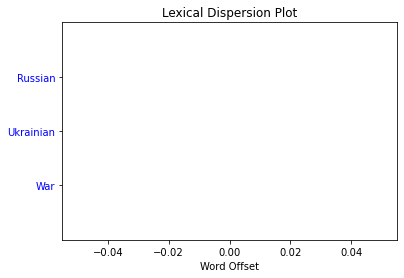

In [49]:
##MJ: Tried different words, but still doesn't show anything?
ukraine_tokens.dispersion_plot(["Russian", "Ukrainian", "War"])

### Similar Words

In [50]:
ukraine_tokens.similar('partner')

like ukraine friends currently wife know time looking kiev nt hey
people language supposed ukrainian visiting russian going want guys


### Common Context

In [51]:
ukraine_tokens.common_contexts(['mom', 'dad'])  ##MJ: We need to change the input to match our data?

No common contexts were found


## 2.4 Incorporating Time


In [52]:
pd.to_datetime(1207632114, unit='s')

Timestamp('2008-04-08 05:21:54')

In [53]:
#new colum with date and time
df.insert(loc=3, column='created_datetime', value=pd.to_datetime(df['created'], unit='s'))
df.head(3)

,idint,idstr,created,created_datetime,nsfw,author,title,selftext,lemmas,score,distinguish,textlen,num_comments,flair_text,flair_css_class,detect
0,26781072,t3_fy0eo,1299351508,2011-03-05 18:58:28,0,margys,"Мам, а когда я выросту, ты постареешь?...",Сегодня моя золотая птичка снова задалась вопр...,сегодня моя золотая птичка снова задалась вопр...,0,NaN,204,0,NaN,NaN,en
1,26795140,t3_fyb9g,1299397232,2011-03-06 07:40:32,0,pozhaluista,Does the /r/ Ukraine have anyone here? Hello?,Seems quiet.,quiet,10,NaN,13,24,NaN,NaN,en
2,29482904,t3_hjx5k,1306343697,2011-05-25 17:14:57,0,visarun,Does immigration in Simferpol check whether th...,I have stayed 70 days and then 80 days out of ...,stayed days days days know borispol pretty str...,0,NaN,223,1,NaN,NaN,en


In [54]:
#create new variables years
years = pd.DatetimeIndex(df['created_datetime']).year
print(years)

Int64Index([2011, 2011, 2011, 2011, 2011, 2011, 2011, 2011, 2011, 2011,
            ...
            2022, 2022, 2022, 2022, 2022, 2022, 2022, 2022, 2022, 2022],
           dtype='int64', name='created_datetime', length=16646)


In [55]:
#before 2013
df_2013 = df.loc[(years <= 2013), :]
len(df_2013)

126

## Q. How to add another contraction after 2014?

In [56]:
#after 2013 & before 2022
df_b2022 = df.loc[(years <= 2022) & (years >=2013), :]
len(df_b2022)

16520

In [57]:
#after 2022
df_a2022 = df.loc[(years >= 2022), :]
len(df_a2022)

9383

In [58]:
# visualize data
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme()

sns.set(rc={'figure.figsize': (7, 5)})

p = sns.histplot(
    ##data=df_2021, ##MJ: changed the dataframe
    data=df_a2022
    x=months_array,
    hue="flair_css_class",
    multiple="stack")

plt.xticks(rotation=70)
plt.tight_layout()

SyntaxError: invalid syntax (2332242677.py, line 11)

# Term Frequency-Inverse Document Frequency (TF-IDF)

In [59]:
aita = pd.read_csv('ukraine_lemmas.csv')

In [66]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Settings that you use for count vectorizer will go here
tfidf_vectorizer = TfidfVectorizer(max_df=0.85,
                                   decode_error='ignore',
                                   stop_words='english',
                                   smooth_idf=True,
                                   use_idf=True)

# Fit and transform the texts
tfidf = tfidf_vectorizer.fit_transform(aita['lemmas'])

In [67]:
# Place TF-IDF values in a DataFrame
df = pd.DataFrame(tfidf.todense(), columns=tfidf_vectorizer.get_feature_names_out().ravel())

In [70]:
df.head(20)

,00,000,00012340,00013962,000147123,0001bdb4ca60e95849a09137ac9082af2b67,00032106payee,000eur,000l,000ruble,...,𝐬𝐞𝐜𝐨𝐧𝐝,𝐭𝐡𝐞,𝐭𝐡𝐢𝐫𝐝,𝐰𝐚𝐫,𝔉𝔢𝔡𝔢𝔯𝔞𝔩,𝙹ᒲ,𝙹リ,𝙹リℸ,𝙹リ𝙹,𝙹ꖎ𝙹
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [62]:
# Highest TF-IDF values across documents
df.sum().sort_values(ascending=False)

ukraine                578.853722
https                  391.731019
ukrainian              343.911766
russian                319.397661
know                   305.674112
                          ...    
1498974101066727427      0.001169
khiv                     0.001169
casusbellii              0.001169
cqv2ej_nq                0.001169
1498985949728022529      0.001169
Length: 69564, dtype: float64

# Using TF-IDF to find Similar Posts

In [63]:
doc_idx = 25

In [64]:
aita['selftext'].iloc[doc_idx]

"Hey /r/ukraine!\n\nLong story short, I'm researching Ukrainian-American history, i.e. immigration to America and I'm not finding any good, solid sources. I was wondering if /r/ukraine would know of any good places to find information on this topic? For reference, my best source so far is a book called Ukrainian Immigrants in New York by Halyna Lemekh; all internet sources have failed."

In [65]:
df.loc[doc_idx].sort_values(ascending=False)

sources            0.304821
lemekh             0.296862
halyna             0.284857
story_short        0.264335
immigrants         0.209686
                     ...   
googlemaps         0.000000
googler            0.000000
googles            0.000000
googletranslate    0.000000
𝙹ꖎ𝙹                0.000000
Name: 25, Length: 69564, dtype: float64

In [71]:
from sklearn.metrics.pairwise import cosine_similarity
similarities = cosine_similarity(tfidf)
similarities.shape

(16646, 16646)

In [72]:
similar_df = pd.DataFrame({
    'text': aita['selftext'].values,
    'score': similarities[doc_idx]}).sort_values('score', ascending=False)

In [73]:
similar_df['text'].iloc[0]

"Hey /r/ukraine!\n\nLong story short, I'm researching Ukrainian-American history, i.e. immigration to America and I'm not finding any good, solid sources. I was wondering if /r/ukraine would know of any good places to find information on this topic? For reference, my best source so far is a book called Ukrainian Immigrants in New York by Halyna Lemekh; all internet sources have failed."

In [74]:
similar_df['text'].iloc[1]

"I've been trying to find good sources for Ukrainian Folklore and fairy tales for research, though Google searches have not led me to any sources I feel comfortable going off of. Does anyone know any good sources I could use?"

In [75]:
similar_df['text'].iloc[2]

'Back to ask another question, what would be good, accurate and well written history book on the Ukraine? Or even books that tell the history of different parts of ukraine history, like people or places?'